In [39]:
import pandas as pd

In [40]:
dataset = pd.read_csv("incident_event_log.csv")

In [41]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [62]:
len(dataset)

141712

In [42]:
dataset.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [43]:
incident_state = dataset["incident_state"].tolist()

In [44]:
active = dataset["active"].tolist()

In [45]:
from collections import defaultdict

def sum_of_catogery(catogery_list):
    dic = defaultdict(int)
    for a in catogery_list:
        dic[a] += 1
    
    return dic

In [46]:
incident_state_dic = sum_of_catogery(incident_state)
incident_state_dic

defaultdict(int,
            {'New': 36407,
             'Resolved': 25751,
             'Closed': 24985,
             'Active': 38716,
             'Awaiting User Info': 14642,
             'Awaiting Problem': 461,
             'Awaiting Vendor': 707,
             'Awaiting Evidence': 38,
             '-100': 5})

In [47]:
active_dic = sum_of_catogery(active)
active_dic

defaultdict(int, {True: 116726, False: 24986})

In [104]:
def column_to_list(dataset,name_of_list):
    alist = dataset[name_of_list].tolist()
    return alist

In [49]:
reassignment_count = column_to_list("reassignment_count")
reassignment_count_dic = sum_of_catogery(reassignment_count)
reassignment_count_dic

defaultdict(int,
            {0: 69876,
             1: 37104,
             2: 15097,
             3: 8274,
             4: 4614,
             5: 2595,
             6: 1447,
             7: 985,
             8: 574,
             9: 365,
             10: 285,
             11: 174,
             12: 108,
             13: 61,
             14: 45,
             15: 21,
             16: 13,
             17: 16,
             18: 13,
             19: 8,
             20: 16,
             21: 3,
             22: 9,
             23: 2,
             24: 1,
             25: 1,
             26: 2,
             27: 3})

In [50]:
reopen_count = column_to_list("reopen_count")
reopen_count_dic = sum_of_catogery(reopen_count)
reopen_count_dic

defaultdict(int,
            {0: 139398,
             1: 1918,
             2: 190,
             3: 107,
             4: 48,
             5: 24,
             6: 18,
             7: 5,
             8: 4})

In [52]:
sys_mod_count = column_to_list("sys_mod_count")
sys_mod_count_dic = sum_of_catogery(sys_mod_count)
sys_mod_count_dic

defaultdict(int,
            {0: 24913,
             2: 19749,
             3: 14168,
             4: 10735,
             1: 22062,
             5: 8550,
             6: 7014,
             7: 5758,
             8: 4678,
             9: 3846,
             10: 3115,
             11: 2502,
             12: 2075,
             13: 1647,
             18: 672,
             19: 608,
             14: 1359,
             15: 1129,
             16: 937,
             17: 799,
             20: 502,
             21: 445,
             22: 380,
             23: 331,
             26: 226,
             28: 195,
             30: 155,
             31: 153,
             32: 130,
             33: 122,
             34: 114,
             91: 6,
             92: 4,
             93: 6,
             99: 3,
             101: 3,
             102: 2,
             44: 52,
             45: 48,
             60: 23,
             61: 20,
             62: 16,
             105: 1,
             106: 1,
             24: 293,

In [58]:
def sort_by_key(dd):
    d = dict(dd)
    d = sorted(d.items(), key = lambda item:item[0])

    return d
#d = dict(sys_mod_count_dic)
#sorted(d.items(), key = lambda item:item[0])

In [57]:
d = sort_by_key()

{0: 24913,
 2: 19749,
 3: 14168,
 4: 10735,
 1: 22062,
 5: 8550,
 6: 7014,
 7: 5758,
 8: 4678,
 9: 3846,
 10: 3115,
 11: 2502,
 12: 2075,
 13: 1647,
 18: 672,
 19: 608,
 14: 1359,
 15: 1129,
 16: 937,
 17: 799,
 20: 502,
 21: 445,
 22: 380,
 23: 331,
 26: 226,
 28: 195,
 30: 155,
 31: 153,
 32: 130,
 33: 122,
 34: 114,
 91: 6,
 92: 4,
 93: 6,
 99: 3,
 101: 3,
 102: 2,
 44: 52,
 45: 48,
 60: 23,
 61: 20,
 62: 16,
 105: 1,
 106: 1,
 24: 293,
 43: 52,
 49: 36,
 50: 27,
 51: 29,
 25: 255,
 27: 214,
 29: 159,
 41: 56,
 42: 54,
 40: 69,
 39: 70,
 46: 49,
 47: 31,
 48: 42,
 53: 24,
 55: 31,
 56: 38,
 57: 31,
 59: 23,
 58: 27,
 65: 22,
 66: 22,
 67: 15,
 38: 80,
 119: 1,
 128: 1,
 129: 1,
 64: 26,
 73: 15,
 74: 18,
 77: 14,
 83: 8,
 89: 5,
 90: 6,
 75: 20,
 35: 110,
 70: 12,
 71: 17,
 52: 29,
 115: 2,
 116: 2,
 54: 24,
 36: 101,
 37: 101,
 88: 7,
 87: 8,
 94: 7,
 95: 4,
 86: 7,
 72: 11,
 63: 18,
 112: 1,
 113: 2,
 114: 2,
 117: 1,
 76: 14,
 79: 14,
 80: 14,
 81: 12,
 69: 14,
 82: 10,
 78: 17,


In [54]:
made_sla = column_to_list("made_sla")
made_sla_dic = sum_of_catogery(made_sla)
made_sla_dic

defaultdict(int, {True: 132497, False: 9215})

In [55]:
contact_type = column_to_list("contact_type")
contact_type_dic = sum_of_catogery(contact_type)
contact_type_dic

defaultdict(int,
            {'Phone': 140462,
             'Email': 220,
             'Self service': 995,
             'Direct opening': 17,
             'IVR': 18})

In [106]:
def df_to_ddic(dataset,column_name):
    a = column_to_list(dataset,column_name)
    dic = sum_of_catogery(a)
    
    return dic

In [63]:
impact_dict = df_to_ddic("impact")
impact_dict

defaultdict(int, {'2 - Medium': 134335, '1 - High': 3491, '3 - Low': 3886})

In [65]:
urgency_dict = df_to_ddic("urgency")
urgency_dict

defaultdict(int, {'2 - Medium': 134094, '3 - Low': 3598, '1 - High': 4020})

In [66]:
priority_dict = df_to_ddic("priority")
priority_dict

defaultdict(int,
            {'3 - Moderate': 132452,
             '2 - High': 2972,
             '4 - Low': 4030,
             '1 - Critical': 2258})

In [67]:
notify_dict = df_to_ddic("notify")
notify_dict

defaultdict(int, {'Do Not Notify': 141593, 'Send Email': 119})

In [94]:
# "resolved_at" column has 3141 "?" values considered as NA.
resolved_at_dic = df_to_ddic("resolved_at")
r = dict(resolved_at_dic)
r["?"]

defaultdict(int,
            {'29/2/2016 11:29': 4,
             '1/3/2016 09:52': 9,
             '1/3/2016 02:55': 7,
             '2/3/2016 12:06': 9,
             '29/2/2016 15:51': 8,
             '29/2/2016 16:01': 8,
             '3/3/2016 16:00': 12,
             '2/3/2016 15:21': 13,
             '2/3/2016 14:37': 4,
             '2/3/2016 11:11': 11,
             '8/3/2016 09:55': 8,
             '1/3/2016 10:38': 8,
             '1/3/2016 15:37': 6,
             '11/4/2016 14:39': 17,
             '29/2/2016 16:27': 3,
             '29/2/2016 09:04': 6,
             '29/2/2016 11:20': 5,
             '2/3/2016 11:40': 8,
             '29/2/2016 16:05': 5,
             '12/4/2016 14:46': 9,
             '2/3/2016 14:44': 4,
             '1/3/2016 15:45': 9,
             '2/3/2016 14:46': 4,
             '29/2/2016 09:05': 3,
             '3/3/2016 14:35': 10,
             '7/3/2016 08:45': 14,
             '?': 3141,
             '10/3/2016 10:45': 5,
             '2/3/2016 1

3141

In [97]:
closed_at_ddic = df_to_ddic("closed_at")
closed_at_ddic

defaultdict(int,
            {'5/3/2016 12:00': 48,
             '6/3/2016 10:00': 84,
             '6/3/2016 03:00': 7,
             '7/3/2016 13:00': 61,
             '5/3/2016 16:00': 10,
             '5/3/2016 17:00': 52,
             '8/3/2016 17:00': 156,
             '7/3/2016 16:00': 148,
             '7/3/2016 15:00': 142,
             '7/3/2016 12:00': 99,
             '24/3/2016 18:40': 2808,
             '6/3/2016 11:00': 21,
             '6/3/2016 16:00': 54,
             '16/4/2016 15:07': 269,
             '5/3/2016 10:00': 11,
             '17/4/2016 15:07': 197,
             '8/3/2016 15:00': 122,
             '12/3/2016 09:00': 5,
             '24/3/2016 18:50': 2846,
             '24/3/2016 18:59': 3324,
             '6/3/2016 12:00': 20,
             '7/3/2016 20:00': 25,
             '8/3/2016 02:00': 9,
             '6/3/2016 09:00': 19,
             '6/3/2016 13:00': 28,
             '6/3/2016 17:00': 78,
             '27/3/2016 13:59': 206,
             '8/3/201

In [155]:
# Dose "closed_at" column have "?" value?
c = dict(closed_at_ddic)
if "?" in c.keys():
    print("True")
else: 
    print("False")

False


#### plot the "resolved_at" and "closed_at", try to find the relation between them

In [ ]:
df2=dataset[~dataset['resolved_at'].isin(["?"])]
len(df2)

In [160]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


KeyError: '?'

In [110]:
len(df2)

138571

In [126]:
import time, datetime
from datetime import datetime

In [127]:
a1 = dataset["resolved_at"][:2]
a1[1]

'29/2/2016 11:29'

In [130]:
timeArray = time.strptime(a1[1], "%d/%m/%Y %H:%M")
timeArray

time.struct_time(tm_year=2016, tm_mon=2, tm_mday=29, tm_hour=11, tm_min=29, tm_sec=0, tm_wday=0, tm_yday=60, tm_isdst=-1)

In [131]:
timeStamp = int(time.mktime(timeArray))
timeStamp

1456741740

In [137]:
from datetime import datetime
def time2stamp(cmnt_time):   #转时间戳函数
    cmnt_time=datetime.strptime(cmnt_time,'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [140]:
df2["resolved_at"] = df2["resolved_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
df2["closed_at"] = df2["closed_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1456822320,1457254800


In [156]:
%matplotlib notebook

<IPython.core.display.Javascript object>


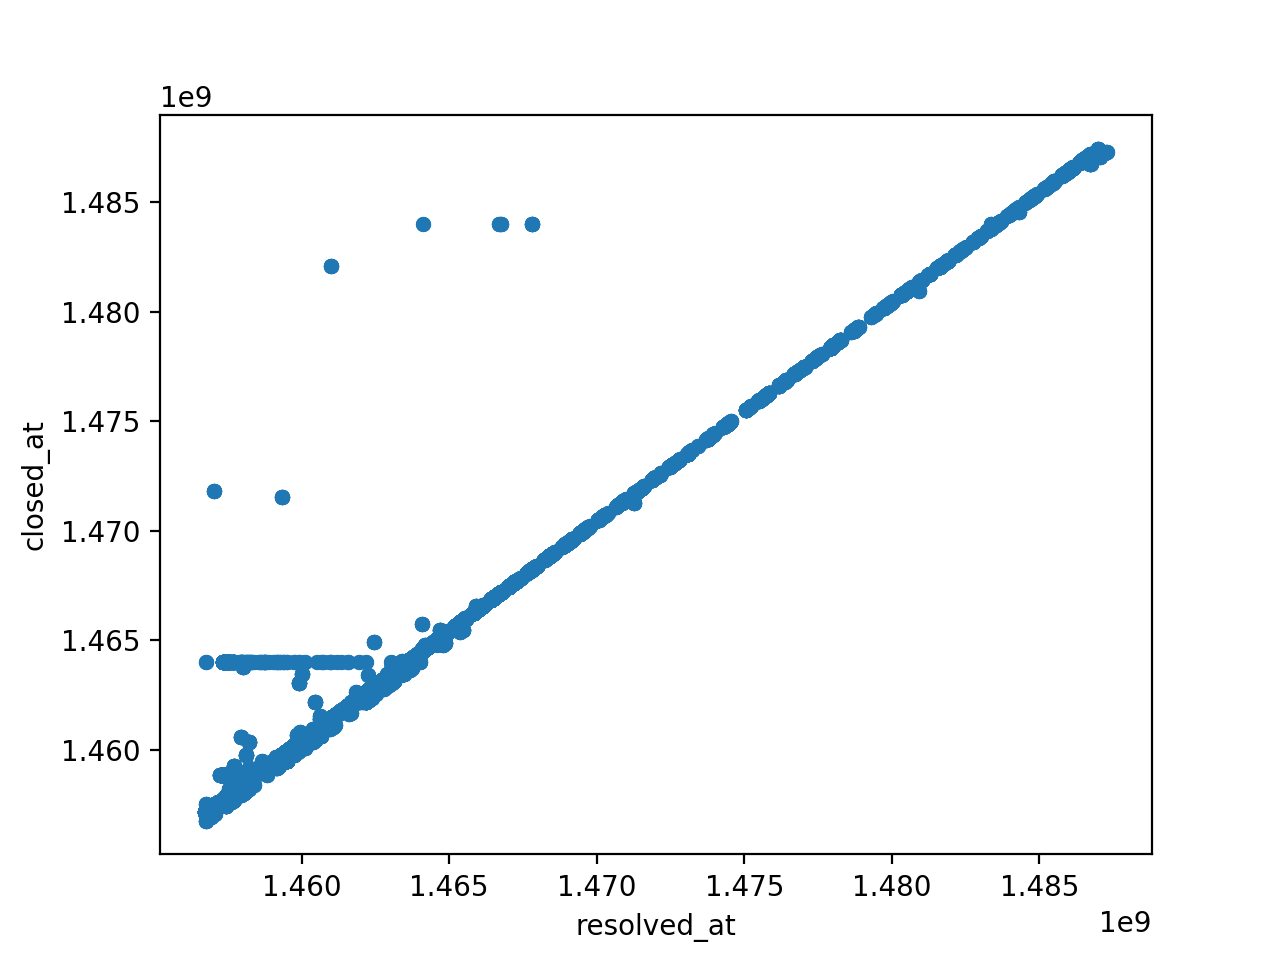

In [145]:
df2.plot.scatter(x="resolved_at",y="closed_at")